In [147]:
# Load the Pandas libraries
import os
import io
import pandas as pd
import numpy as np
from collections import defaultdict

In [148]:
# Load Surprise libraries
from surprise import KNNBasic, SVD
from surprise import Reader
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import cross_validate

In [149]:
# Load Plotting libraries
%matplotlib inline
import matplotlib.pyplot as plt

In [150]:
df = pd.read_json('../output/final/data-comm.json', lines=True)

In [151]:
ratings = df[['user_id','book_id','note']]
ratings['note'] = ratings['note'].replace('', None)
ratings['note'] = pd.to_numeric(ratings['note'])
mean_notes = ratings['note'].mean()
ratings['note'] = ratings['note'].fillna(mean_notes)

/var/folders/j3/n3dz9by90yd9388qpd2nsgxm0000gn/T/ipykernel_29058/3118797375.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings['note'] = ratings['note'].replace('', None)
/var/folders/j3/n3dz9by90yd9388qpd2nsgxm0000gn/T/ipykernel_29058/3118797375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings['note'] = pd.to_numeric(ratings['note'])
/var/folders/j3/n3dz9by90yd9388qpd2nsgxm0000gn/T/ipykernel_29058/3118797375.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [152]:
df[df['user_id'] == 1091475]

,book_id,book_nb_comm,title,name,surname,img_url,comm_id,user_id,note,date,...,book_editor,book_pages,sen_colère,sen_confiance,sen_honte,sen_joie,sen_peur,sen_réflexion,sen_surprise,sen_tristesse
132377,1025461,102,Sa majesté des ombres,Ghislain,Gilberti,https://images-eu.ssl-images-amazon.com/images...,2541629,1091475,5.0,27 février 2021,...,Ring,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
228717,1429797,149,Le manufacturier,Mattias,Köping,https://images-eu.ssl-images-amazon.com/images...,2569394,1091475,5.0,21 mars 2021,...,Ring,548,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
241508,1236172,131,Ohio,Stephen,Markley,https://m.media-amazon.com/images/I/41SZcOerGW...,2687011,1091475,4.0,27 juin 2021,...,Le Livre de Poche,640,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [153]:
ratings.value_counts('note')

note
4.000000    92006
5.000000    83747
3.000000    40265
4.500000    26745
3.500000    25272
3.948693    18423
2.000000    12562
2.500000     6972
1.000000     5241
1.500000     1567
0.500000     1195
5.500000       14
dtype: int64

In [154]:
#movie_ratings = df.pivot_table(index=['user_id'],columns=['book_id'], values='note',aggfunc=lambda x: len(x.unique()), fill_value=0)

In [155]:
reader = Reader(line_format = 'user item rating', rating_scale = (1, 5))
data = Dataset.load_from_df(ratings, reader)

In [156]:
# Use k-NN algorithm with user-based collaborative filtering and cosine similarity
kk = 50
sim_options = {'name': 'cosine', 'user_based': True}
algo = KNNBasic(k = kk, sim_options = sim_options, verbose = True)
#algo = SVD(n_factors=5, n_epochs= 200, biased= True, lr_all= 0.005, reg_all= 0, init_mean= 0, init_std_dev= 0.01)

In [157]:
# Run 5-fold cross-validation and print results
cv = cross_validate(algo, data, measures = ['RMSE', 'MAE'], cv = 5, verbose = True)

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8942  0.8889  0.8885  0.8962  0.8896  0.8915  0.0031  
MAE (testset)     0.6531  0.6488  0.6488  0.6540  0.6478  0.6505  0.0025  
Fit time          33.32   31.92   34.63   33.41   33.08   33.27   0.86    
Test time         2.91    3.59    3.12    3.01    2.81    3.09    0.27    


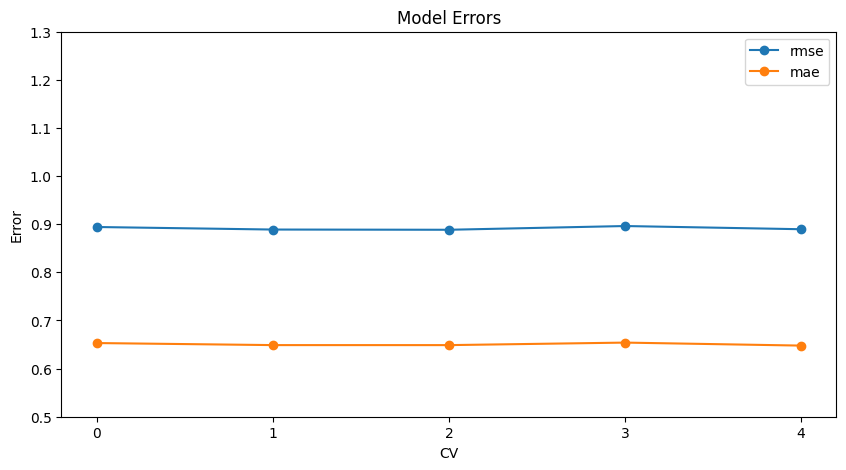

In [158]:
# Get data
rmse = cv['test_rmse']
mae = cv['test_mae']
x = np.arange(len(rmse))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize = (10, 5))
plt.xticks(np.arange(min(x), max(x) + 1, 1.0))
plt.ylim(0.5, 1.3)
ax.plot(x, rmse, marker='o', label="rmse")
ax.plot(x, mae, marker='o', label="mae")

# Chart setup
plt.title("Model Errors", fontsize = 12)
plt.xlabel("CV", fontsize = 10)
plt.ylabel("Error", fontsize = 10)
plt.legend()
plt.show()

In [159]:
# Without real rating
p1 = algo.predict(uid = 1091475, iid = 609937, verbose = True) # Jacky38 : userid = 1091475

user: 1091475    item: 609937     r_ui = None   est = 3.95   {'was_impossible': True, 'reason': 'Not enough neighbors.'}


In [160]:
# With real rating
p2 = algo.predict(uid = 128814, iid = 905033, r_ui = 5, verbose = True) # Jean Michel : 128814

user: 128814     item: 905033     r_ui = 5.00   est = 4.66   {'actual_k': 9, 'was_impossible': False}


## Get the k nearest neighbors of an book

In [161]:
df_book = df.groupby(['book_id','title'], as_index=False).count()

In [166]:
id = 1829
df_book.query('book_id == @id')

,book_id,title,book_nb_comm,name,surname,img_url,comm_id,user_id,note,date,...,book_editor,book_pages,sen_colère,sen_confiance,sen_honte,sen_joie,sen_peur,sen_réflexion,sen_surprise,sen_tristesse
25,1829,"De Cape et de Crocs, tome 2 : Pavillon noir !",34,34,34,34,34,34,34,34,...,34,34,34,34,34,34,34,34,34,34


In [165]:
df_book

,book_id,title,book_nb_comm,name,surname,img_url,comm_id,user_id,note,date,...,book_editor,book_pages,sen_colère,sen_confiance,sen_honte,sen_joie,sen_peur,sen_réflexion,sen_surprise,sen_tristesse
0,1497,Sur la route,70,70,70,70,70,70,70,70,...,70,70,70,70,70,70,70,70,70,70
1,1499,Le Baron perché,70,70,70,70,70,70,70,70,...,70,70,70,70,70,70,70,70,70,70
2,1508,"Le Photographe, tome 1",57,57,57,57,57,57,57,57,...,57,57,57,57,57,57,57,57,57,57
3,1523,Fouché,70,70,70,70,70,70,70,70,...,70,70,70,70,70,70,70,70,70,70
4,1526,Amok ou Le fou de Malaisie,70,70,70,70,70,70,70,70,...,70,70,70,70,70,70,70,70,70,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4561,1462096,"Les chevaliers d'Emeraude, tome 5 : L'île des ...",38,38,38,38,38,38,38,38,...,38,38,38,38,38,38,38,38,38,38
4562,1462133,"Vampire Academy, tome 2 : Morsure de glace",70,70,70,70,70,70,70,70,...,70,70,70,70,70,70,70,70,70,70
4563,1466000,Le Nom de la Rose,70,70,70,70,70,70,70,70,...,70,70,70,70,70,70,70,70,70,70
4564,1467600,"A la recherche du temps perdu, tome 4 : Sodome...",37,37,37,37,37,37,37,37,...,37,37,37,37,37,37,37,37,37,37


In [163]:
# Retrieve inner ids of the nearest neighbors of Toy Story
inner_id = algo.trainset.to_inner_iid(1829)
list_predict = algo.get_neighbors(inner_id, k = 10)
list_predict

[2619, 82, 302, 779, 790, 1181, 1787, 2385, 3334, 4239]

In [164]:
# The 10 nearest neighbors of Toy Story are:
book_test = df_book.query('book_id == 1829')
print("The movies most similar to '" + book_test['title'] + " are:")

for inner_id in list_predict:
    book_id = algo.trainset.to_raw_iid(inner_id)
    print(book_id, df_book.loc[df_book['book_id']==book_id,'title'])

25    The movies most similar to 'De Cape et de Croc...
Name: title, dtype: object
577357 1807    Les Vieux Fourneaux, tome 1 : Ceux qui restent
Name: title, dtype: object
124352 1031    Quitter le monde
Name: title, dtype: object
1314567 4156    Celle qu'il attendait
Name: title, dtype: object
6865 324    L'assassin royal, tome 10 : Serments et deuils
Name: title, dtype: object
146784 1075    Gouverneurs de la rosée
Name: title, dtype: object
1382053 4387    666
Name: title, dtype: object
622858 1922    Bondrée
Name: title, dtype: object
1149726 3517    Le roman des Goscinny : Naissance d'un gaulois
Name: title, dtype: object
930400 2761    La cave
Name: title, dtype: object
84999 941    Mange, prie, aime : Changer de vie, on en a to...
Name: title, dtype: object
